In [8]:
from PyAWD.AcousticWaveDataset import *
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [4]:
train = torch.load("../../local/datasets/AWD/train_small.pt")

In [5]:
test = torch.load("../../local/datasets/AWD/test_small.pt")

In [9]:
norm_mses = []
for s in tqdm(range(10, 0, -1)):
    sx = s/10
    train.set_scaling_factor(sx)
    test.set_scaling_factor(sx)
    X = [train[i][1].flatten() for i in range(train.size)]
    Y = [train[i][0][0] for i in range(train.size)]
    lr = LinearRegression().fit(X, Y)
    X_test = np.array([test[i][1].flatten() for i in range(test.size)])
    Y_test = np.array([test[i][0][0] for i in range(test.size)])
    Y_hat = lr.predict(X_test)
    MAE = np.mean(np.abs(Y_test-Y_hat))
    norm_mses.append(MAE/((nx//2)*sx))

  0%|          | 0/10 [00:00<?, ?it/s]

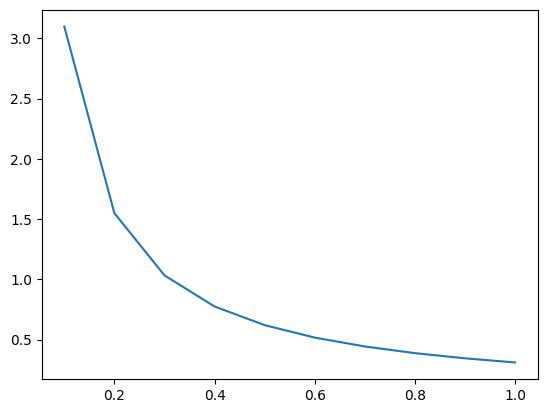

In [10]:
plt.plot(np.arange(0.1, 1.1, 0.1), norm_mses[::-1])